# Textual analysis and comparison of constitutions

In this notebook, we will start the process of analyzing the constitutions, in addition to developing some means of reading them in. 

In [1]:
import os
import re
import nltk
import collections
import numpy as np
import pandas as pd
import codecs
from sklearn import feature_extraction
import mpld3

from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from math import sqrt

%matplotlib inline

In [2]:
try:
    os.chdir(os.getcwd()+'\\texts')
except:
    print('Seemingly already there!')

In [3]:
dictionaryFile = open('dictionary.txt').read()
dictwords = re.findall('\w+', dictionaryFile.lower())

In [4]:
filelist = os.listdir()

In [5]:
filelist[0]

'AK1836_final_parts_0.txt'

The following is a method to clean up a file and make it into a sequence of words. There are quite possibly better ways to check and see if there are words that are mistakenly strung together. I also create some additional methods for figuring out lexical diversity, and the size of the vocabulary used. 

In [6]:
def Cleaner(filename, flag=0):
    file  = open(filename, encoding='cp1252', errors='ignore').read()
    words = re.findall('\w+', file.lower())

    keepers = []
    for i in range(0,len(words)):
        if words[i] in dictwords:
            keepers.append(words[i])
        else:
            if i < len(words) -2:    
                if (words[i] + words[i+1] in dictwords) & (words[i] + words[i+1] != 'bylaw'):
                    keepers.append(words[i]+words[i+1]) 
                    
    if flag == 0:
        keepers = [word for word in keepers if word not in stopwords.words('english')]
    
    return nltk.Text(keepers)

def Cleaner_list(filename, flag=0):
    file  = open(filename, encoding='cp1252', errors='ignore').read()
    words = re.findall('\w+', file.lower())

    keepers = []
    for i in range(0,len(words)):
        if words[i] in dictwords:
            keepers.append(words[i])
        else:
            if i < len(words) -2:    
                if (words[i] + words[i+1] in dictwords) & (words[i] + words[i+1] != 'bylaw'):
                    keepers.append(words[i]+words[i+1]) 
    
    if flag == 0:
        keepers = [word for word in keepers if word not in stopwords.words('english')]
    
    return keepers  

def VocabSize(text):
    return len(set(text))

def LexicalDiversity(text):
    return VocabSize(text) / len(text)

def LongWords(text, cutl_ength=5, freq=5):
    freq_dist = nltk.FreqDist(text)
    return sorted(w for w in set(text) if len(w) > 5 and freq_dist[w] > 5 )

def CosineSim(u,v):
    a=np.array(u)/len(u)
    b=np.array(v)/len(v)
    return np.dot(a,b) / (sqrt(np.dot(a,a))*sqrt(np.dot(b,b)))

def flatten(x):
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result


# Some preliminary analysis 

Here, I'm just going to take a look at what is possible before moving on, to try and get a feel for what a raggedy constitution looks like! In this take on things, I do not remove the stopwords because I am keeping `flag=1`. This is useful because then we can get N-grams that do not have stopwords after doing this, which should give a cleaner set of collocated words. 

Here is a little ngram finder that I stole from stack overflow:

In [7]:
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

In [8]:
Ark1836 = Cleaner(filelist[0], 1)

In [9]:
Ark1836_2g = find_ngrams(Ark1836.tokens, 2)

In [10]:
cleangrams = []
for gram in Ark1836_2g:
    flag = 0
    for word in gram:
        if word in stopwords.words('english'):
            flag = 1
    if flag == 0:
        cleangrams.append(gram)

In [11]:
sorted(set(cleangrams))

[('absence', 'business'),
 ('absent', 'impeached'),
 ('acceptance', 'arkansas'),
 ('acceptance', 'compact'),
 ('accepted', 'ratified'),
 ('according', 'dictates'),
 ('according', 'elect'),
 ('according', 'law'),
 ('according', 'number'),
 ('according', 'rules'),
 ('account', 'less'),
 ('accrue', 'use'),
 ('accused', 'aright'),
 ('acquiring', 'possessing'),
 ('acquitted', 'liable'),
 ('acquitted', 'send'),
 ('act', 'supplementary'),
 ('acting', 'governor'),
 ('actions', 'covenant'),
 ('actions', 'law'),
 ('actions', 'prosecutions'),
 ('acts', 'congress'),
 ('actual', 'residence'),
 ('actually', 'resides'),
 ('addition', 'duties'),
 ('address', 'send'),
 ('adhering', 'enemies'),
 ('adjourn', 'may'),
 ('adjournment', 'shall'),
 ('adjutant', 'general'),
 ('admission', 'arkansas'),
 ('affirmation', 'justice'),
 ('affirmation', 'support'),
 ('aforesaid', 'writs'),
 ('age', 'native'),
 ('age', 'one'),
 ('age', 'thirty'),
 ('age', 'twenty'),
 ('agree', 'pass'),
 ('agricultural', 'interests'),


In [12]:
Col1876 = Cleaner(filelist[15])

In [13]:
fdist1 = nltk.FreqDist(Ark1836)

In [14]:
fdist2 = nltk.FreqDist(Col1876)

In [15]:
for thing in fdist1.most_common(50):
    print(thing, end=' ')

print('****************************************************')

for thing in fdist2.most_common(50):
    print(thing, end=' ')

('the', 746) ('shall', 395) ('and', 342) ('send', 132) ('state', 113) ('for', 99) ('may', 82) ('one', 82) ('any', 81) ('general', 68) ('county', 68) ('have', 63) ('that', 60) ('assembly', 59) ('which', 59) ('elect', 59) ('all', 57) ('from', 52) ('such', 48) ('law', 48) ('this', 47) ('their', 44) ('two', 43) ('not', 42) ('house', 38) ('office', 38) ('each', 37) ('governor', 37) ('time', 36) ('years', 34) ('representatives', 34) ('other', 33) ('court', 31) ('elected', 30) ('arkansas', 29) ('they', 29) ('his', 29) ('power', 28) ('who', 28) ('counties', 28) ('states', 27) ('courts', 27) ('united', 25) ('until', 24) ('are', 23) ('with', 23) ('peace', 23) ('circuit', 23) ('every', 22) ('representative', 22) ****************************************************
('shall', 2239) ('state', 884) ('county', 645) ('section', 628) ('general', 502) ('may', 490) ('city', 385) ('november', 358) ('said', 347) ('law', 340) ('governor', 320) ('provided', 319) ('assembly', 313) ('property', 302) ('upon', 30

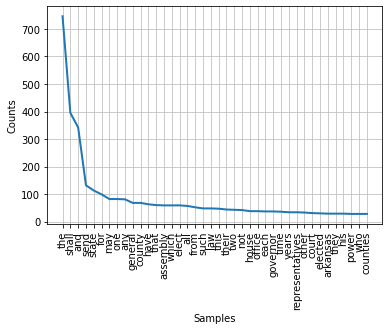

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
fdist1.plot(40)

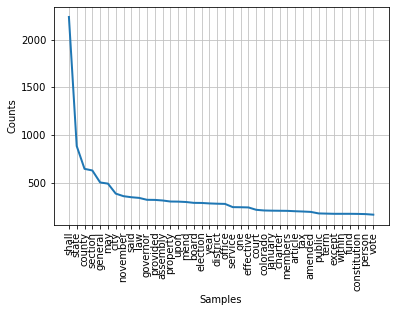

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
fdist2.plot(40)

Here are some collocations from this document. One possible point of distinguising things might be "free white". 

In [18]:
Ark1836.collocations()

general assembly; united states; elect one; one representative;
representative county; shall elect; senator counties; compose one; one
senator; free white; supreme court; ratified november; shall compose;
house representatives; white male; two representatives; joint vote;
representatives county; state arkansas; november mend


In [19]:
Col1876.collocations()

general assembly; mend section; november effective; proclamation
governor; upon proclamation; amended november; city county; united
states; home rule; effective upon; supreme court; fiscal year; january
mend; limited gaming; registered electors; county denver; valuation
assessment; qualified electors; property tax; city town


In [20]:
Ark1836.concordance('white')

Displaying 12 of 12 matches:
 purposes address send that the free white men this state shall have aright rig
ouse representatives send every free white male citizen the united states who s
twenty five years who shall not free white male citizen the who shall not have 
tained the age thirty years not free white male citizen the united states who s
the senate shall based upon the free white male inhabitants the state each equa
d elect one senator counties pulaski white and saline shall compose one dis and
nearly practicable equal number free white male inhabitants county long its pop
he senate shall fifteen hundred free white each senator until the senators amou
ut the state such ratio numbers free white male inhabitants may require without
ies this state according number free white male inhabitants therein taking five
all elect two representatives county white shall elect one representative count
the several counties the number free white males each county above prescribed s


In [21]:
Col1876.concordance('white')

no matches


In [22]:
print(Ark1836.common_contexts(['free'], 50))
print(Ark1836.common_contexts(['senator'], 50))

number_white the_white not_white the_pursuit and_govern all_govern
shall_and shall_every the_communication every_white hundred_white
numbers_white preservation_government
None
one_counties shall_who send_representative one_the one_and each_until
None


In [23]:
print(Col1876.common_contexts(['free'], 50))

value_games legislature_state
None


Note the conspicuous presence of "white male" and "free white"...where do these terms usually occur?

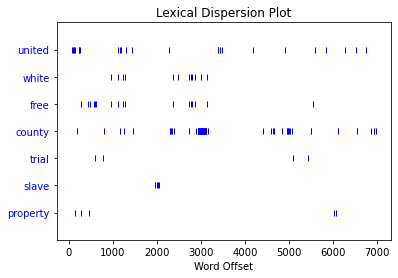

In [24]:
Ark1836.dispersion_plot(['united', 'white', 'free', 'county', 'trial', 'slave', 'property'])

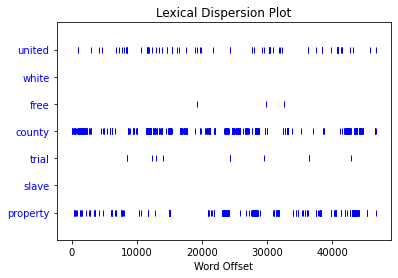

In [25]:
Col1876.dispersion_plot(['united', 'white', 'free', 'county', 'trial', 'slave', 'property'])

# Some preliminary comparisons

Let's see if we can get the first say twenty documents and compare them. I'm actually going to do this without really knowing what the files are

In [26]:
const_dict = {}
for item in filelist:
    result = re.search('[^_]*', item)
    result = result.group(0)
    const_dict['{}'.format(result) ] = Cleaner(item)
    print(result, end=' ')

AK1836 AK1959 AL1819 AL1861 AL1865 AL1868 AL1875 AL1901 AL1901 AL1901 AL1901 AR1864 AR1868 AR1874 AZ1912 CO1876 CO1876 CO1876 Constitution.npy CT1662 CT1818 CT1955 CT1965 DE1776 DE1792 DE1831 DE1897 dictionary.txt FL1838%20 FL1861 FL1865 FL1868 FL1885 FL1968%20 Hawaii1959 Hawaii1968 Hawaii1978 IA1846 IA1857 IA1857 ID1890 IL1818 IL1848 IL1870 IL1970 IN%201816 IN%201851 KS1859 KS1859 KY1792 KY1799 KY1850 Ky1890amd KY1890 LA1812 LA1845 LA1852 LA1861 LA1864 LA1868 MD1776 MD1851 MD1864 MD1867 MD1867 MD1867 MD1867 ME1819 ME1819 MI1835 MI1850 MI1850 MI1908 MI1908 MI1908 MI1962 MI1962 MN1857 MN1857 MN1974 MN1974 MS1817 MS1832 MS1832 MS1861 MS1868 MS1890 MT1889 MT1973 NC1776 NC1868 NC1971 ND ND NH1776 NH1784 NH1792 NJ1776 NJ1844 NJ1947 NJ1947 NM1911 NV1864 NV1864 NY1777 NY1821 NY1846 NY1894 NY1894 NY1938 NY1938 NY1938 NY1938 NY1938 OH1802 OH1851 OK1907 OK1907 OK1907 OK1907 PA1776 PA1790 PA1839 PA1874 PA1969 RI1843 RI1986 SC1776 SC1778 SC1790 SC1861 SC1865 SC1868 SC1896 SD1889 test TX%201866 TX%

Since it took so long, we should probably pickle the result:

In [27]:
np.save('Constitution.npy', const_dict)

In [28]:
Combined=[]

for item in const_dict:
    Combined.append(const_dict[item].tokens)

# A final block of code is needed so that we aren't left with a list of lists, but instead
# have one big list with both sources. 
Combined = flatten(Combined)

We now have a list of all the words that occur in all of the state constitutions over time. So, this functions as a relative point of safety. Let's just take the 5000 most common for the basis for comparison. 

In [29]:
freq = nltk.FreqDist(Combined)
CompVec = freq.most_common(1000)
CompWords = [item[0] for item in CompVec]

Let's compute similarity using this. How would we count the times within which each of these words occurs? 

In [30]:
vec_dict = {}
for item in const_dict:
    vec_dict[item] = [const_dict[item].count(word) for word in CompWords]
    try: 
        print(item, LexicalDiversity(const_dict[item]), VocabSize(const_dict[item]) )
    except:
        print('something wrong')


AK1836 0.2583580194667795 1221
AK1959 0.1705515587529976 1778
AL1819 0.25602104837077516 1265
AL1861 0.2542471042471042 1317
AL1865 0.27207582061950997 1177
AL1868 0.25284140584018183 1446
AL1875 0.21850273889227023 1795
AL1901 0.16001925457296107 2327
AR1864 0.2529058116232465 1262
AR1868 0.21493743482794578 1649
AR1874 0.08786610878661087 3024
AZ1912 0.07184086247197444 3012
CO1876 0.17360851699663804 1859
Constitution.npy 0.0257387597852371 628
CT1662 0.3382862803368004 683
CT1818 0.16355620867009552 1113
CT1955 0.2688968335035751 1053
CT1965 0.14844212770998697 1253
DE1776 0.3216743119266055 561
DE1792 0.27770465912082126 1055
DE1831 0.21977611940298508 1178
DE1897 0.09144182639482358 2247
dictionary.txt 0.999358832633208 45201
FL1838%20 0.22541885259773228 1332
FL1861 0.25903369874137233 1276
FL1865 0.2541469194312796 1287
FL1868 0.19767441860465115 1768
FL1885 0.0790602217729584 2581
FL1968%20 0.04765045342126958 2601
Hawaii1959 0.21579358874120408 1380
Hawaii1968 0.1796937039137

In [31]:
print(CosineSim(vec_dict['AL1819'], vec_dict['AL1868']))
print(CosineSim(vec_dict['AL1819'], vec_dict['PA1969']))
print(CosineSim(vec_dict['KY1799'], vec_dict['AL1868']))
print(CosineSim(vec_dict['NJ1947'], vec_dict['AL1868']))
print(CosineSim(vec_dict['IL1870'], vec_dict['FL1885']))
print(CosineSim(vec_dict['IL1870'], vec_dict['FL1885']))

0.9248053491209023
0.8481593994724217
0.9140557452210538
0.8671838195208666
0.8956998810254103
0.8956998810254103


In [32]:
Sims = []
for item in vec_dict:
    CS = CosineSim(vec_dict['CT1965'], vec_dict[item])    
    Sims.append((item, CS))
    
Sims.sort(key = lambda x:x[1])

C:\Users\mjbaker\AppData\Local\Temp\ipykernel_19736\1142390570.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(a,b) / (sqrt(np.dot(a,a))*sqrt(np.dot(b,b)))


In [33]:
Sims

[('Constitution.npy', 0.009520697061935795),
 ('dictionary.txt', 0.30025810204093467),
 ('NH1776', 0.45808414998370633),
 ('CT1662', 0.4745919424882382),
 ('MI1908', 0.518633115137622),
 ('OK1907', 0.5810053548542173),
 ('SC1776', 0.6613450970161928),
 ('MD1776', 0.6816535243022548),
 ('SC1896', 0.7124172970979754),
 ('SC1861', 0.712477226273601),
 ('Hawaii1968', 0.7333504674114322),
 ('NY1777', 0.7376109870594192),
 ('AR1874', 0.7440387022687653),
 ('FL1968%20', 0.7457720742880649),
 ('FL1885', 0.7573403301681527),
 ('MT1973', 0.7649935371630306),
 ('NJ1776', 0.7688762217513537),
 ('MN1974', 0.7787547455256579),
 ('DE1897', 0.7816101232034885),
 ('UT1895', 0.7816824098347839),
 ('SD1889', 0.7891094843356083),
 ('NY1938', 0.7892369152607754),
 ('PA1776', 0.7893266140049565),
 ('Ky1890amd', 0.7903422386669178),
 ('AK1959', 0.7912229075273013),
 ('SC1790', 0.7934885907726805),
 ('wv1872', 0.7965088687397557),
 ('ID1890', 0.7973966837985013),
 ('SC1778', 0.7985116928792082),
 ('AZ1912', 0

In [34]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt') # if necessary...


stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


print(cosine_sim('a little bird', 'a little bird'))
print(cosine_sim('a little bird', 'a little bird chirps'))
print(cosine_sim('a little bird', 'a big dog barks'))

0.9999999999999998
0.7092972666062738
0.0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mjbaker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\mjbaker\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'tog

In [35]:
vec_dict['AL1868']

[412,
 124,
 187,
 100,
 71,
 105,
 24,
 193,
 26,
 48,
 30,
 41,
 24,
 32,
 15,
 29,
 1,
 80,
 10,
 24,
 24,
 32,
 24,
 34,
 38,
 4,
 24,
 0,
 24,
 24,
 15,
 18,
 17,
 34,
 20,
 6,
 16,
 29,
 23,
 21,
 26,
 19,
 1,
 13,
 10,
 17,
 8,
 29,
 10,
 18,
 2,
 16,
 12,
 15,
 26,
 13,
 22,
 5,
 15,
 12,
 17,
 13,
 12,
 17,
 4,
 18,
 13,
 13,
 22,
 20,
 13,
 11,
 18,
 8,
 17,
 9,
 0,
 17,
 3,
 6,
 15,
 1,
 7,
 10,
 9,
 9,
 5,
 9,
 7,
 8,
 2,
 8,
 8,
 9,
 13,
 9,
 0,
 6,
 8,
 6,
 7,
 2,
 4,
 0,
 0,
 6,
 11,
 6,
 9,
 5,
 5,
 14,
 6,
 14,
 11,
 2,
 7,
 6,
 6,
 2,
 4,
 3,
 1,
 6,
 1,
 7,
 3,
 5,
 5,
 2,
 7,
 5,
 9,
 4,
 4,
 7,
 0,
 8,
 10,
 16,
 3,
 7,
 5,
 9,
 1,
 2,
 0,
 3,
 7,
 6,
 0,
 6,
 0,
 10,
 1,
 10,
 4,
 10,
 4,
 0,
 6,
 9,
 2,
 4,
 3,
 4,
 2,
 6,
 6,
 13,
 7,
 4,
 4,
 5,
 13,
 9,
 6,
 11,
 3,
 3,
 2,
 7,
 9,
 6,
 3,
 3,
 3,
 2,
 5,
 5,
 16,
 3,
 1,
 8,
 3,
 4,
 9,
 4,
 4,
 5,
 7,
 3,
 17,
 5,
 0,
 3,
 8,
 6,
 3,
 0,
 8,
 5,
 8,
 4,
 6,
 1,
 7,
 3,
 6,
 3,
 2,
 4,
 3,
 3,
 3,
 3,
 3,
 2,

In [36]:
const_dict['AK1836'].collocations()

general assembly; united states; elect one; one representative;
representative county; shall elect; senator counties; compose one;
justices peace; one senator; free white; supreme court; ratified
november; white male; house representatives; shall compose; joint
vote; two representatives; november mend; representatives county


In [37]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens.collocations()

In [38]:
for item in sorted(set(vec_dict)):
    print(item, end=' ')

AK1836 AK1959 AL1819 AL1861 AL1865 AL1868 AL1875 AL1901 AR1864 AR1868 AR1874 AZ1912 CO1876 CT1662 CT1818 CT1955 CT1965 Constitution.npy DE1776 DE1792 DE1831 DE1897 FL1838%20 FL1861 FL1865 FL1868 FL1885 FL1968%20 Hawaii1959 Hawaii1968 Hawaii1978 IA1846 IA1857 ID1890 IL1818 IL1848 IL1870 IL1970 IN%201816 IN%201851 KS1859 KY1792 KY1799 KY1850 KY1890 Ky1890amd LA1812 LA1845 LA1852 LA1861 LA1864 LA1868 MD1776 MD1851 MD1864 MD1867 ME1819 MI1835 MI1850 MI1908 MI1962 MN1857 MN1974 MS1817 MS1832 MS1861 MS1868 MS1890 MT1889 MT1973 NC1776 NC1868 NC1971 ND NH1776 NH1784 NH1792 NJ1776 NJ1844 NJ1947 NM1911 NV1864 NY1777 NY1821 NY1846 NY1894 NY1938 OH1802 OH1851 OK1907 PA1776 PA1790 PA1839 PA1874 PA1969 RI1843 RI1986 SC1776 SC1778 SC1790 SC1861 SC1865 SC1868 SC1896 SD1889 TX%201866 TX%201869 TX%201876 TX1845 UT1895 WV1861 WY1889 dictionary.txt test ward wash1889 wv1872 

# Experimentation

This is some code that comes from [this website](http://brandonrose.org/clustering). 

In [39]:
from nltk.stem.snowball import SnowballStemmer

In [40]:
stemmer = SnowballStemmer("english")

In [41]:
stemmer

In [42]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [43]:
stem = tokenize_and_stem(const_dict['AK1836'])

TypeError: expected string or bytes-like object

In [44]:
type(const_dict['AL1819'])

nltk.text.Text

In [45]:
AL1819 = open('AL1819_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
AL1861 = open('AL1861_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
AL1865 = open('AL1865_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
AL1875 = open('AL1875_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
AL1901 = open('AL1901_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
AR1864 = open('AR1864_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
AR1868 = open('AR1868_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
AR1874 = open('AR1874_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
AZ1912 = open('AZ1912_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
CO1876 = open('CO1876_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
CT1662 = open('CT1662_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
CT1818 = open('CT1818_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
CT1955 = open('CT1955_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
CT1965 = open('CT1965_final_parts_0.txt', encoding='latin-1', errors='ignore').read() 
DE1776 = open('DE1776_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
DE1792 = open('DE1792_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
DE1831 = open('DE1831_final_parts_0.txt', encoding='latin-1', errors='ignore').read() 
DE1897 = open('DE1897_final_parts_0.txt', encoding='latin-1', errors='ignore').read() 
FL1838 = open('FL1838%20_final_parts_0.txt', encoding='latin-1', errors='ignore').read()
FL1861 = open('FL1861_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
FL1865 = open('FL1865_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
FL1868 = open('FL1868_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
FL1885 = open('FL1885_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
FL1968 = open('FL1968%20_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
AK1959 = open('AK1959_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
HI1959 = open('Hawaii1959_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
HI1968 = open('Hawaii1968_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
HI1978 = open('Hawaii1978_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
IA1846 = open('IA1846_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
IA1857 = open('IA1857_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
ID1890 = open('ID1890_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
IL1818 = open('IL1818_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
IL1848 = open('IL1848_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
IL1870 = open('IL1870_final_parts_0.txt', encoding='latin_1', errors='ignore').read()
IL1970 = open('IL1970_final_parts_0.txt', encoding='latin_1', errors='ignore').read()

In [46]:
tokenlist = [AL1819, AL1861, AL1865, AL1875, AL1901, AR1864, AR1874,
             AR1868, AZ1912, CO1876, CT1662, CT1818, CT1955, CT1965, 
             DE1776, DE1792, DE1831, DE1897, FL1838, FL1861, FL1865, FL1868, FL1885, 
             FL1968, AK1959, HI1959, HI1968, HI1978, IA1846, IA1857,
             ID1890, IL1818, IL1848, IL1870, IL1970]
tokennames = ['AL1819', 'AL1861', 'AL1865', 'AL1875', 'AL1901', 'AR1864',
              'AR1868', 'AR1874', 'AZ1912', 'CO1876', 'CT1662', 'CT1818', 'CT1955',
              'CT1965', 'DE1776', 'DE1792', 'DE1831', 'DE1897', 'FL1838', 'FL1861', 
              'FL1865', 'FL1868', 'FL1885', 'FL1968', 'AK1959', 'HI1959', 'HI1968', 'HI1978',
              'IA1846', 'IA1857', 'ID1890', 'IL1818', 'IL1848', 'IL1870', 'IL1970']

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

In [48]:
tfidf_matrix = tfidf_vectorizer.fit_transform(tokenlist)

C:\Users\mjbaker\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


In [49]:
print(tfidf_matrix.shape)

(35, 200000)


In [50]:
tfidf_matrix

<35x200000 sparse matrix of type '<class 'numpy.float64'>'
	with 414198 stored elements in Compressed Sparse Row format>

Not sure what this gets us...doesn't seem like it gets us too much!

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
np.shape(dist)

(35, 35)

# K-means clustering

In [52]:
from sklearn.cluster import KMeans

num_clusters = 6

km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [53]:
Data = pd.DataFrame(list(zip(clusters, tokennames)), columns=['clusters', 'names'])

In [54]:
clusters = set(Data['clusters'])

In [55]:
for cluster in clusters:
    Slice = Data['names'].loc[Data['clusters'] == cluster]
    print('Cluster ',cluster)
    for name in list(Slice):
        print(name, end= ' ')
    print(' ')

Cluster  0
IL1818 IL1848 IL1870 IL1970  
Cluster  1
AL1819 AL1861 AL1865 AL1875 AL1901  
Cluster  2
CO1876 CT1662 CT1818 CT1955 CT1965 DE1776 DE1792 DE1831 DE1897 IA1846 IA1857 ID1890  
Cluster  3
FL1838 FL1861 FL1865 FL1868 FL1885 FL1968  
Cluster  4
AZ1912 AK1959 HI1959 HI1968 HI1978  
Cluster  5
AR1864 AR1868 AR1874  


# Hierarchical Clustering

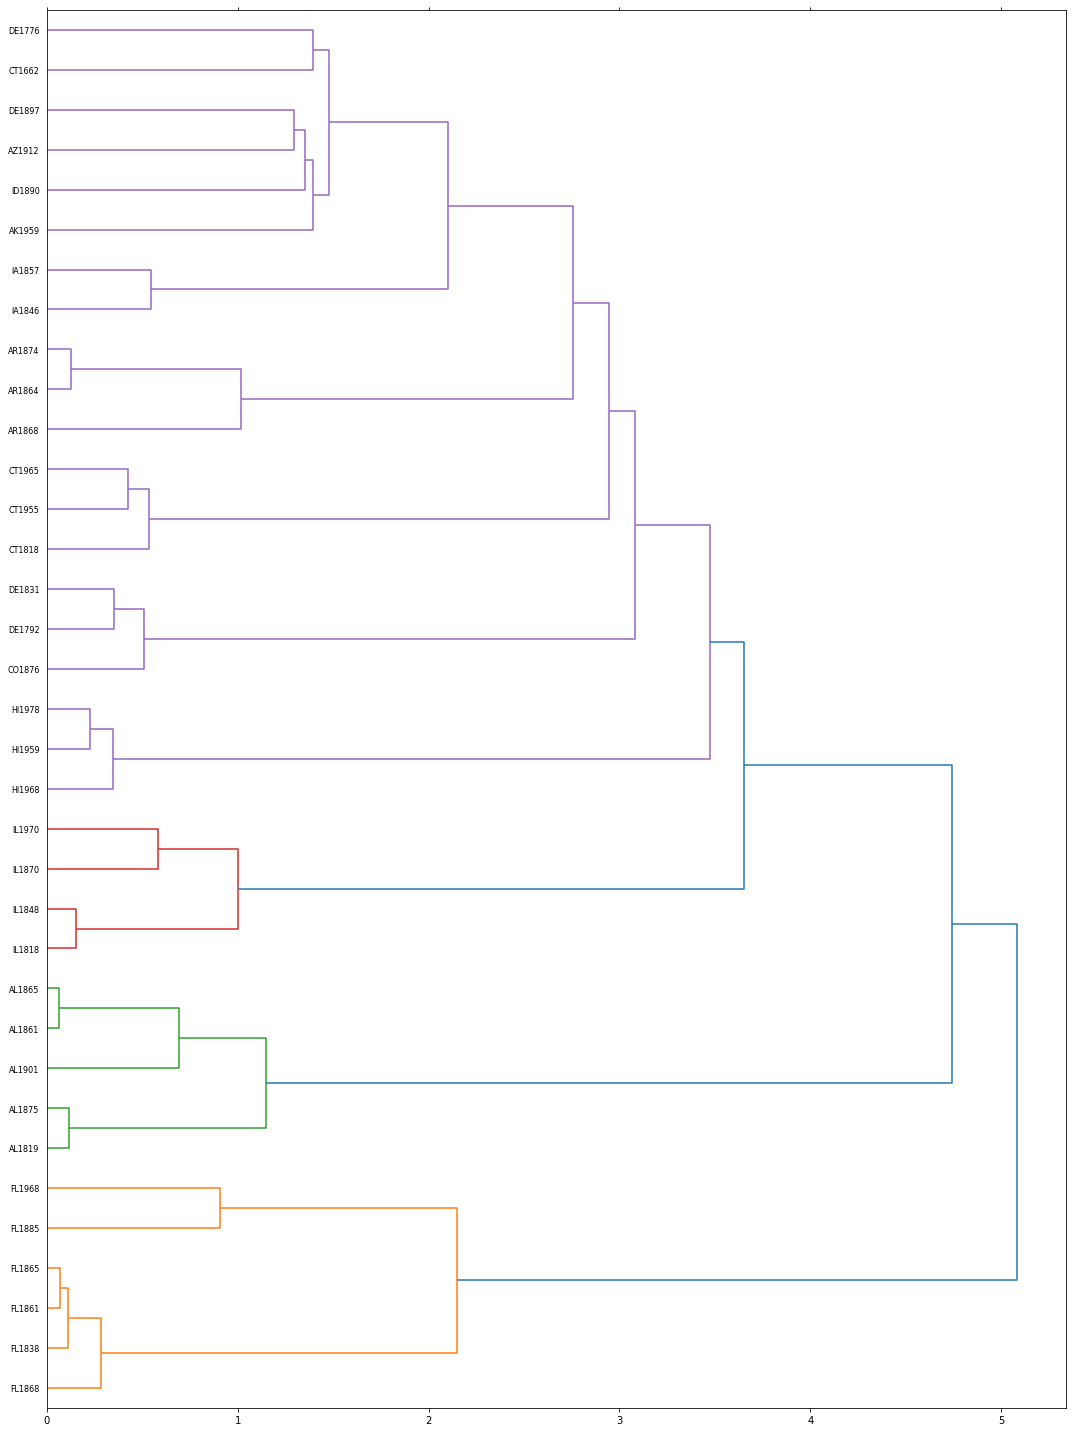

In [56]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=tokennames);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

## Preliminary conclusions

We seem to need to do a bit more work just looking at the constitutions and understanding their structure. Note that they are typically written with an almost XML like structure so we should probably start treating them that way.